In [245]:
#IMPORTS
%run Functions.ipynb
%run ../datuslib.ipynb
import pandas as pd
import string
import numpy as np
import random
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import time
import category_encoders as ce

from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder 

In [246]:
#CARGA DATA
#negativity = pd.read_csv("../../TP1/Axel/tweets_con_negatividad.csv")
train = pd.read_csv('negativity_train_1.csv')
#train["negativity"] = negativity["negativity"]

#negativity = pd.read_csv("tweets_con_negatividad_to_predict.csv")
to_predict = pd.read_csv('negativity_test_1.csv')
#to_predict["negativity"] = negativity["negativity"]


In [247]:
#context = Context(data = train)

In [248]:
#to_predict['negativity'] = context.predict(to_predict)

In [249]:
#to_predict.fillna("Nothing", inplace= True)
#to_predict['negativity'] = to_predict.apply(lambda row : getTweetNegativity(row,context), axis = 1)
#to_predict.to_csv('tweets_con_negatividad_to_predict.csv')

In [250]:
to_predict

,id,keyword,location,text,negativity,len,word_count,unique_word_count,url_count,mean_word_length,...,Tiene_terrible,Tiene_threatening,Tiene_U,Tiene_V,Tiene_vice,Tiene_W,Tiene_wound,Tiene_Y,Tiene_yell,Tiene_
0,0,NaN,NaN,Just happened a terrible car crash,5.776360,34,6,6,False,4.833333,...,True,False,False,False,False,False,False,False,False,True
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",4.623644,64,9,9,False,6.222222,...,False,False,False,False,False,False,False,False,False,True
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",35.003031,96,19,19,False,4.105263,...,False,False,False,False,False,False,False,False,False,True
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,0.376091,40,4,4,False,9.250000,...,False,False,False,False,False,False,False,False,False,True
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,13.845640,45,8,8,False,4.750000,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,4.265089,55,8,7,False,6.000000,...,False,False,True,False,False,True,False,True,False,True
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,60.442693,139,23,22,False,5.086957,...,False,False,False,False,False,False,False,False,False,True
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,6.287638,55,6,6,True,8.333333,...,False,False,True,False,False,False,False,True,False,True
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,10.715910,65,7,7,True,8.428571,...,False,False,False,False,False,True,False,False,False,True


In [251]:
#train['negativity'] = context.predict(train)
#train

In [252]:
featuresKNN(train, to_predict)

In [253]:
#features(train, to_predict)

#binary(train, to_predict)

In [254]:
#has_words(train, to_predict) 

In [255]:
train.head(50)

,id,keyword,location,text,target,negativity,len,word_count,unique_word_count,url_count,...,Tiene_terrible,Tiene_threatening,Tiene_U,Tiene_V,Tiene_vice,Tiene_W,Tiene_wound,Tiene_Y,Tiene_yell,Tiene_
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,21.348555,0.246429,0.240741,13,False,...,False,False,False,False,False,False,False,False,False,True
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,14.728416,0.135714,0.129630,7,False,...,False,False,False,False,False,False,False,False,False,True
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,140.659580,0.475000,0.407407,20,False,...,False,False,False,False,False,False,False,False,False,True
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,10.849614,0.232143,0.166667,8,False,...,False,False,False,False,False,False,False,False,False,True
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,50.498401,0.314286,0.314815,15,False,...,False,False,False,False,False,False,False,False,False,True
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,28.648012,0.392857,0.333333,18,False,...,False,False,True,False,False,False,False,False,False,True
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,22.771166,0.339286,0.259259,14,False,...,False,False,False,False,False,False,False,False,False,True
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,29.916236,0.210714,0.277778,14,False,...,False,False,False,False,False,False,False,False,False,True
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,24.832278,0.282143,0.222222,11,False,...,False,False,False,False,False,False,False,False,False,True
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,10.841209,0.185714,0.185185,10,False,...,False,False,False,False,False,False,False,False,False,True


In [256]:
#train.to_csv('negativity_train_1.csv', index=False)
#to_predict.to_csv('negativity_test_1.csv', index=False)
train.columns

Index(['id', 'keyword', 'location', 'text', 'target', 'negativity', 'len',
       'word_count', 'unique_word_count', 'url_count', 'mean_word_length',
       'hashtag_count', 'mention_count', 'Kindex', 'key_bit0', 'key_bit1',
       'key_bit2', 'key_bit3', 'key_bit4', 'key_bit5', 'key_bit6', 'key_bit7',
       'Tiene_angry', 'Tiene_awful', 'Tiene_B', 'Tiene_bad', 'Tiene_C',
       'Tiene_can't', 'Tiene_cold', 'Tiene_collapse', 'Tiene_crazy',
       'Tiene_criminal', 'Tiene_cry', 'Tiene_D', 'Tiene_damage',
       'Tiene_damaging', 'Tiene_dead', 'Tiene_disease', 'Tiene_don't',
       'Tiene_E', 'Tiene_F', 'Tiene_fail', 'Tiene_fear', 'Tiene_fight',
       'Tiene_G', 'Tiene_greed', 'Tiene_H', 'Tiene_hard', 'Tiene_hate',
       'Tiene_I', 'Tiene_ill', 'Tiene_injure', 'Tiene_J', 'Tiene_L',
       'Tiene_mean', 'Tiene_missing', 'Tiene_N', 'Tiene_never', 'Tiene_no',
       'Tiene_not', 'Tiene_O', 'Tiene_offensive', 'Tiene_old', 'Tiene_P',
       'Tiene_pain', 'Tiene_plain', 'Tiene_poor', 'Tiene

### Completo cosas

In [257]:
train.fillna("Nothing", inplace= True)


train.drop(columns=["id"], axis=1,inplace = True)

train.drop(columns=["location"], axis=1,inplace = True)

train['keyword'] = train['keyword'].str.replace('%',' ')
train['keyword'] = train['keyword'].str.replace('2','')
train['keyword'] = train['keyword'].str.replace('0','')

keyword_in_text(train)
train.drop(columns=["text"], axis=1,inplace = True)


c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


### Pongo algun Feature

In [258]:
train["Tiene_key_impor"] = (train["keyword"] == "wreckage") | (train["keyword"] == "debris") | (train["keyword"] == "derailment") 
#| (train["keyword"] == "outbreak") | (train["keyword"] == "oil split")\
#| (train["keyword"] == "typhoon") | (train["keyword"] == "suicide bombing") | (train["keyword"] == "suicide bomber")

train["Tiene_key_no_impor"] = (train["keyword"] == "aftershock")

train.drop(columns=["keyword","Kindex"], axis=1,inplace = True)


#from sklearn.preprocessing import LabelEncoder

# Categorical boolean mask
#categorical_feature_mask = train.dtypes==object
# filter categorical columns using mask and turn it into a list
#categorical_cols = train.columns[categorical_feature_mask].tolist()
#categorical_cols

#le = LabelEncoder()

# apply le on categorical feature columns
#train[categorical_cols] = train[categorical_cols].apply(lambda col: le.fit_transform(col))

In [289]:
x = train[train.columns.drop("target")]
y = train['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=87)

print(f"Original shapes: X={x.shape} y={y.shape}")
print(f"Train shapes: X={x_train.shape} y={y_train.shape}")
print(f"Test  shapes: X={x_test.shape}  y={y_test.shape}")


Original shapes: X=(7613, 87) y=(7613,)
Train shapes: X=(6090, 87) y=(6090,)
Test  shapes: X=(1523, 87)  y=(1523,)


In [290]:
x.head(10)

,negativity,len,word_count,unique_word_count,url_count,mean_word_length,hashtag_count,mention_count,key_bit0,key_bit1,...,Tiene_V,Tiene_vice,Tiene_W,Tiene_wound,Tiene_Y,Tiene_yell,Tiene_,contains_keyword,Tiene_key_impor,Tiene_key_no_impor
0,21.348555,0.246429,0.240741,13,False,4.384615,1,0,0,0,...,False,False,False,False,False,False,True,False,False,False
1,14.728416,0.135714,0.129630,7,False,4.571429,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
2,140.659580,0.475000,0.407407,20,False,5.090909,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
3,10.849614,0.232143,0.166667,8,False,7.125000,1,0,0,0,...,False,False,False,False,False,False,True,False,False,False
4,50.498401,0.314286,0.314815,15,False,4.500000,2,0,0,0,...,False,False,False,False,False,False,True,False,False,False
5,28.648012,0.392857,0.333333,18,False,5.166667,3,0,0,0,...,False,False,False,False,False,False,True,False,False,False
6,22.771166,0.339286,0.259259,14,False,5.857143,2,0,0,0,...,False,False,False,False,False,False,True,False,False,False
7,29.916236,0.210714,0.277778,14,False,3.000000,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
8,24.832278,0.282143,0.222222,11,False,5.666667,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
9,10.841209,0.185714,0.185185,10,False,4.300000,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False


### Fit

In [261]:
k = list(range(2,40))
prueba = pd.DataFrame(k,index=k,columns=["Kactual"])

In [262]:
dists = [
"euclidean",
"manhattan",
"chebyshev"]

In [263]:
knn_best_distance(prueba,dists,x_train,y_train,x_test,y_test)

euclidean --------------------------
con k:  2
Entrenamiento: 88.9491%
Testeo: 78.3979%.
F1 score: 0.7065.
   
con k:  3
Entrenamiento: 89.2611%
Testeo: 81.6809%.
F1 score: 0.7822.
   
con k:  4
Entrenamiento: 87.2742%
Testeo: 81.9435%.
F1 score: 0.7699.
   
con k:  5
Entrenamiento: 87.1264%
Testeo: 82.0092%.
F1 score: 0.7829.
   
con k:  6
Entrenamiento: 86.0263%
Testeo: 82.1405%.
F1 score: 0.7733.
   
con k:  7
Entrenamiento: 85.7964%
Testeo: 83.4537%.
F1 score: 0.7994.
   
con k:  8
Entrenamiento: 85.5172%
Testeo: 82.9284%.
F1 score: 0.7876.
   
con k:  9
Entrenamiento: 85.3859%
Testeo: 83.5194%.
F1 score: 0.8006.
   
con k:  10
Entrenamiento: 84.8933%
Testeo: 83.7163%.
F1 score: 0.7994.
   
con k:  11
Entrenamiento: 84.7291%
Testeo: 83.5850%.
F1 score: 0.8010.
   
con k:  12
Entrenamiento: 84.8933%
Testeo: 83.8477%.
F1 score: 0.8010.
   
con k:  13
Entrenamiento: 84.7619%
Testeo: 83.6507%.
F1 score: 0.8019.
   
con k:  14
Entrenamiento: 84.6470%
Testeo: 83.7163%.
F1 score: 0.7994.


Entrenamiento: 83.3333%
Testeo: 82.4032%.
F1 score: 0.7890.
   
con k:  35
Entrenamiento: 83.3333%
Testeo: 82.4032%.
F1 score: 0.7903.
   
con k:  36
Entrenamiento: 83.3005%
Testeo: 82.5345%.
F1 score: 0.7902.
   
con k:  37
Entrenamiento: 83.3169%
Testeo: 82.4032%.
F1 score: 0.7900.
   
con k:  38
Entrenamiento: 83.2184%
Testeo: 82.4688%.
F1 score: 0.7899.
   
con k:  39
Entrenamiento: 83.2841%
Testeo: 82.4688%.
F1 score: 0.7909.
   


(40, -0.1)

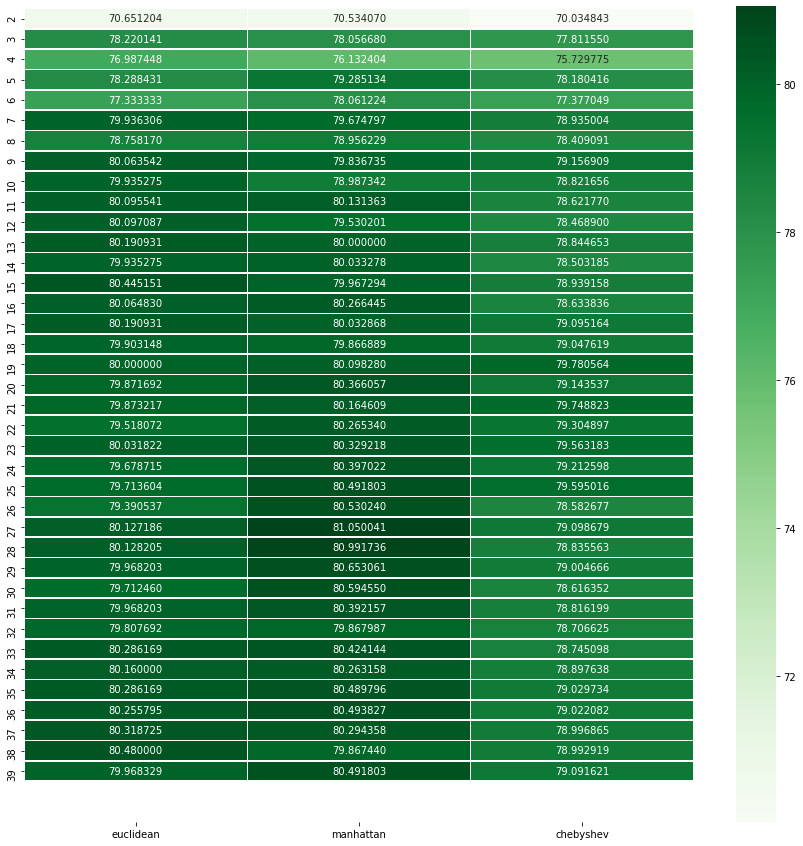

In [264]:
prueba.drop(columns="Kactual",inplace=True)

a= prueba.transform(lambda x: x*100)
plt.figure(figsize=(15, 15))

sns.heatmap(a, annot=True, fmt='.6f', linewidths=.5,cmap="Greens").set_ylim(40,-0.1)

### Test

In [265]:
knn = KNeighborsClassifier(n_neighbors =27, metric="manhattan")
#Entreno con todo el dataset
knn.fit(x_train, y_train)

#evaluate(knn, x_test, y_test)
predecir(knn,x_train,y_train,x_test,y_test)

Entrenamiento: 83.5961%
Testeo: 84.8326%.
F1 score: 0.8105.
   


0.8105004101722724

In [266]:
to_predict

,id,keyword,location,text,negativity,len,word_count,unique_word_count,url_count,mean_word_length,...,Tiene_terrible,Tiene_threatening,Tiene_U,Tiene_V,Tiene_vice,Tiene_W,Tiene_wound,Tiene_Y,Tiene_yell,Tiene_
0,0,NaN,NaN,Just happened a terrible car crash,5.776360,0.121429,0.176471,6,False,4.833333,...,True,False,False,False,False,False,False,False,False,True
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",4.623644,0.228571,0.264706,9,False,6.222222,...,False,False,False,False,False,False,False,False,False,True
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",35.003031,0.342857,0.558824,19,False,4.105263,...,False,False,False,False,False,False,False,False,False,True
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,0.376091,0.142857,0.117647,4,False,9.250000,...,False,False,False,False,False,False,False,False,False,True
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,13.845640,0.160714,0.235294,8,False,4.750000,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,4.265089,0.196429,0.235294,7,False,6.000000,...,False,False,True,False,False,True,False,True,False,True
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,60.442693,0.496429,0.676471,22,False,5.086957,...,False,False,False,False,False,False,False,False,False,True
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,6.287638,0.196429,0.176471,6,True,8.333333,...,False,False,True,False,False,False,False,True,False,True
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,10.715910,0.232143,0.205882,7,True,8.428571,...,False,False,False,False,False,True,False,False,False,True


### Completo Features

In [267]:
to_predict.fillna("Nothing", inplace= True)

ids = to_predict["id"]

to_predict.drop(columns=["id"], axis=1,inplace = True)
to_predict.drop(columns=["location"], axis=1,inplace = True)

to_predict['keyword'] = to_predict['keyword'].str.replace('%',' ')
to_predict['keyword'] = to_predict['keyword'].str.replace('2','')
to_predict['keyword'] = to_predict['keyword'].str.replace('0','')

keyword_in_text(to_predict)
#importance(to_predict)
to_predict.drop(columns=["text"], axis=1,inplace = True)

c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [268]:
to_predict["Tiene_key_impor"] = (to_predict["keyword"] == "wreckage") | (to_predict["keyword"] == "debris")\
| (to_predict["keyword"] == "derailment")
#| (to_predict["keyword"] == "outbreak")\
#| (to_predict["keyword"] == "oil split") | (to_predict["keyword"] == "typhoon") \
#| (to_predict["keyword"] == "suicide bombing") | (to_predict["keyword"] == "suicide bomber")

to_predict["Tiene_key_no_impor"] = (to_predict["keyword"] == "aftershock")
to_predict.drop(columns=["keyword","Kindex"], axis=1,inplace = True)

# Categorical boolean mask
#categorical_feature_mask = to_predict.dtypes==object
# filter categorical columns using mask and turn it into a list
#categorical_cols = to_predict.columns[categorical_feature_mask].tolist()
#categorical_cols

#le = LabelEncoder()

# apply le on categorical feature columns
#to_predict[categorical_cols] = to_predict[categorical_cols].apply(lambda col: le.fit_transform(col))

In [270]:
#Resultado de test
knn = KNeighborsClassifier(n_neighbors =27 , metric="manhattan")

#Entreno con todo el dataset
knn.fit(x, y)

#Predigo la data
predict = knn.predict(to_predict)
predict

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [271]:
comprobar(predict)

F1 Score:  0.6834201654918787
F1 Score default:  0.4837581209395303


## Predicciones reales

In [272]:
test_labels = pd.read_csv("../Data/perfect_submission.csv")
test_labels = test_labels["target"]

### Resultado

In [291]:
#Resultado de test
best_mtr=""
best_k=0
best_f1=0
best_predict = []
for metr in dists:
    for i in range(2,40):
        knn = KNeighborsClassifier(n_neighbors =i, metric=metr)
        #Entreno con todo el dataset
        knn.fit(x_train, y_train)

        #Predigo la data
        predict = knn.predict(x_test)
        predict
    
        f1=f1_score(y_test, predict,average='micro')
        if (f1 > best_f1):
            best_f1 = f1
            best_k  = i
            best_mtr = metr
            best_predict= predict
        print (metr," k: ",i," F1 Score: ", f1)



euclidean  k:  2  F1 Score:  0.7846355876559421
euclidean  k:  3  F1 Score:  0.8174655285620486
euclidean  k:  4  F1 Score:  0.8056467498358504
euclidean  k:  5  F1 Score:  0.8200919238345371
euclidean  k:  6  F1 Score:  0.8174655285620486
euclidean  k:  7  F1 Score:  0.8292843072882468
euclidean  k:  8  F1 Score:  0.8260013131976363
euclidean  k:  9  F1 Score:  0.8292843072882468
euclidean  k:  10  F1 Score:  0.8279711096520027
euclidean  k:  11  F1 Score:  0.8286277084701248
euclidean  k:  12  F1 Score:  0.8319107025607354
euclidean  k:  13  F1 Score:  0.8305975049244911
euclidean  k:  14  F1 Score:  0.8312541037426132
euclidean  k:  15  F1 Score:  0.8299409061063691
euclidean  k:  16  F1 Score:  0.8305975049244911
euclidean  k:  17  F1 Score:  0.8338804990151018
euclidean  k:  18  F1 Score:  0.8319107025607354
euclidean  k:  19  F1 Score:  0.834537097833224
euclidean  k:  20  F1 Score:  0.834537097833224
euclidean  k:  21  F1 Score:  0.8371634931057125
euclidean  k:  22  F1 Score:  

In [292]:
print ("Mejor: metrica: ",best_mtr, ", K = ",best_k, ", F1 = ",best_f1)

Mejor: metrica:  manhattan , K =  13 , F1 =  0.8391332895600788


In [293]:
#Resultado de test
knn = KNeighborsClassifier(n_neighbors = best_k, metric=best_mtr)

#Entreno con todo el dataset
knn.fit(x, y)

#Predigo la data
best_predict = knn.predict(to_predict)
best_predict

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

### Compruebo el F1 Score

In [294]:
 print ("F1 Score: ", f1_score(test_labels, best_predict,average='micro'))

F1 Score:  0.688630095004597


### Guardo Submission

In [241]:
result = submission_output(ids, best_predict,"KNN k=13.csv")
result

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,1
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,1
